# 2-layer neural network (without any hidden layers)
### This part has solution to question 1 and question 2



In [1]:
# Import Python libraries
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression Model 


In [2]:
class LogisticRegression:
    """
    Implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)       
        self.bias = np.zeros((1, output_dim))
        
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
   
    def fit(self,X,y,num_epochs,lr=0.01):     
        
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X, self.theta) + self.bias
            exp_z = np.exp(z)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
                                                                                            
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i, y[i]] = 1
            beta = softmax_scores - one_hot_y
            
            # Compute gradients of model parameters
            dtheta = np.dot(X.T, beta)                                   
            dbias = np.sum(beta, axis = 0)
        
            # Gradient descent parameter update
            self.theta -= lr * dtheta
            self.bias  -= lr * dbias
        
        return 0


In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, alpha = 0.5)
    plt.show()

## Train the model on linear data

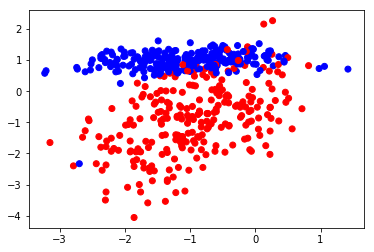

In [4]:
#1. Load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/LinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [5]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

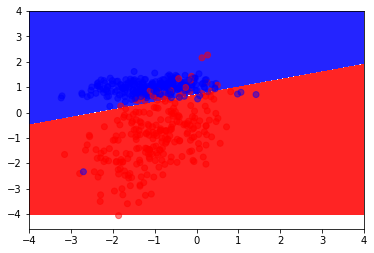

In [6]:
#3. Train the model and Plot decision boundary
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [7]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.93
CONFUSION MATRIX: 
 [[ 244.   29.]
 [   6.  221.]]


In [8]:
#5. compute cost
cost = logreg.compute_cost(X, y)
print(cost)

0.20702892862


## Train the model on non-linear data

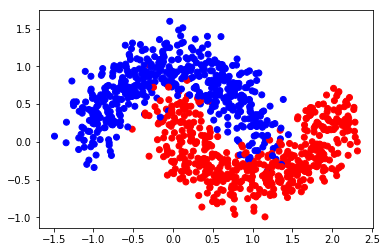

In [9]:
#1. Load data
X1 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y1 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.cm.bwr)
plt.show()

In [10]:
#2. Initialize model
input_dim = np.shape(X1)[1]
output_dim = np.max(y1) + 1
logreg = LogisticRegression(input_dim, output_dim)

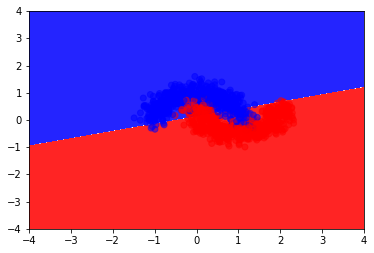

In [11]:
#3. Train the model and Plot decision boundary
logreg.fit(X1,y1,1000,lr=0.001)
plot_decision_boundary(logreg, X1, y1)

In [12]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X1)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y1[i]] += 1
    if y1[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.875
CONFUSION MATRIX: 
 [[ 437.   62.]
 [  63.  438.]]


In [13]:
#5. compute cost
cost = logreg.compute_cost(X, y)
print(cost)

0.370355349357


## Problem 2: Analysis on learning non-linear decision boundary

- Conclusion: According to the diagram, 2-layer neural netwrok model cannot learn non-linear decision boundaries
- Reason: The output is the linear combination of feature variables *x* and weights *w*. There is no interaction among the weights.